In [1]:
# This dataset was obtained from Kaggle
# The dataset contains Netflix content from 2008 to 2021 and relative information

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Gather dataset and convert to DataFrame and then view first five rows
df = pd.read_csv(r'/Users/Karandeep/Downloads/Netflix-Data.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
# Check info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
# Check for duplicates
df.duplicated().value_counts()

False    8790
dtype: int64

In [8]:
# Group by duration, count values, and sort in descending order by show_id
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
duration,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1


In [9]:
# Fix variable data types
# Work with copy of dataframe for cleaning
df_clean = df.copy()

In [10]:
df_clean.date_added = pd.to_datetime(df_clean.date_added)

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [12]:
# Listed_in has several categories, assume the first category is the 'main' category of the movie
df_clean['listed_in1'] = 0
df_clean['listed_in2'] = 0
df_clean['listed_in3'] = 0

temp_cat = df_clean.listed_in.str.split(',')
# Split strings around given separator/delimiter.

i=0
for i in range (8790):
# We know we have 8790 entries

    t_cat = temp_cat[i]
    
    if len(t_cat) == 1:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = 0
        df_clean['listed_in3'][i] = 0
        
    if len(t_cat) == 2:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = 0
        
    if len(t_cat) == 3:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = temp_cat[i][2]

/var/folders/mc/4gd9wld50ns1vjc6g4vp41500000gn/T/ipykernel_59966/1031879195.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in1'][i] = temp_cat[i][0]
/var/folders/mc/4gd9wld50ns1vjc6g4vp41500000gn/T/ipykernel_59966/1031879195.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in2'][i] = 0
/var/folders/mc/4gd9wld50ns1vjc6g4vp41500000gn/T/ipykernel_59966/1031879195.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [13]:
df_clean.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies


In [14]:
# We can divide dataset into two, TV Shows and Movies
df_tv = df_clean[df_clean.type == 'TV Show']
df_movie = df_clean[df_clean.type == 'Movie']

In [15]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries


In [16]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals


In [17]:
# Convert duration into integer data type, requires str split to get the integer seperated from the string
temp_dur = df_tv.duration.str.split(' ', expand = True)
df_tv['duration_seasons'] = temp_dur[0]
df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)

/var/folders/mc/4gd9wld50ns1vjc6g4vp41500000gn/T/ipykernel_59966/1704105915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration_seasons'] = temp_dur[0]
/var/folders/mc/4gd9wld50ns1vjc6g4vp41500000gn/T/ipykernel_59966/1704105915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)


In [19]:
temp_dur = df_tv.duration.str.split(' ', expand = True)
df_movie['duration_minutes'] = temp_dur[0]
df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)

/var/folders/mc/4gd9wld50ns1vjc6g4vp41500000gn/T/ipykernel_59966/3511953020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_minutes'] = temp_dur[0]
/var/folders/mc/4gd9wld50ns1vjc6g4vp41500000gn/T/ipykernel_59966/3511953020.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)


In [22]:
# Store dataframes into CSV Files
df_clean.to_csv('Netflix-Data-Cleaned.csv')
df_tv.to_csv('Netflix-TV-Cleaned.csv')
df_movie.to_csv('Netflix-Movie-Cleaned.csv')

In [43]:
# Extracting Insights for the following questions
# What type of media has Netflix produced the most?
# Which country produced the most of Netflix's media?
# What are the most popular genres for countries which produced media?
# Relationship between the year a media was made and when added to Netflix?
# Has media classification changed over time?
# What are the most popular genres?

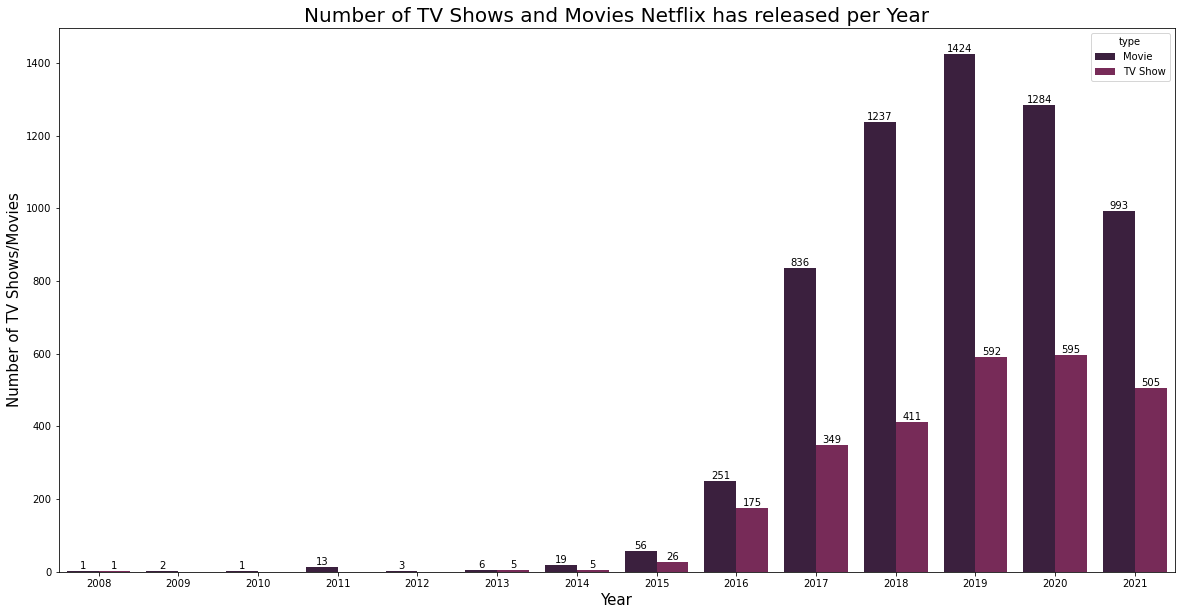

In [25]:
plt.figure(figsize = [20,10])
base_color = sns.color_palette('rocket', n_colors = 5)
tv_movie = sns.countplot(x=df_clean.date_added.dt.year, data = df_clean, hue = 'type', palette = base_color)
tv_movie.set_title('Number of TV Shows and Movies Netflix has released per Year', fontsize = 20)
tv_movie.set_xlabel('Year', fontsize = 15)
tv_movie.set_ylabel('Number of TV Shows/Movies', fontsize = 15)

for container in tv_movie.containers:
    tv_movie.bar_label(container)

In [26]:
# Netflix had a slow start from 2008-2013 with a low number of additions to the streaming service
# Mostly Movies added to the platform up until 2015
# Steady increase from 2013-2019 for both TV Shows and Movies
# Large drops since 2020 which may be due to the impact of the COVID-19 Global Pandemic.

In [27]:
# Checking how many countries produced a TV Show for Netflix
# Will limit to the top 10 countries if we discover a large number of countries

len(df_tv.groupby('country').count().index)

59

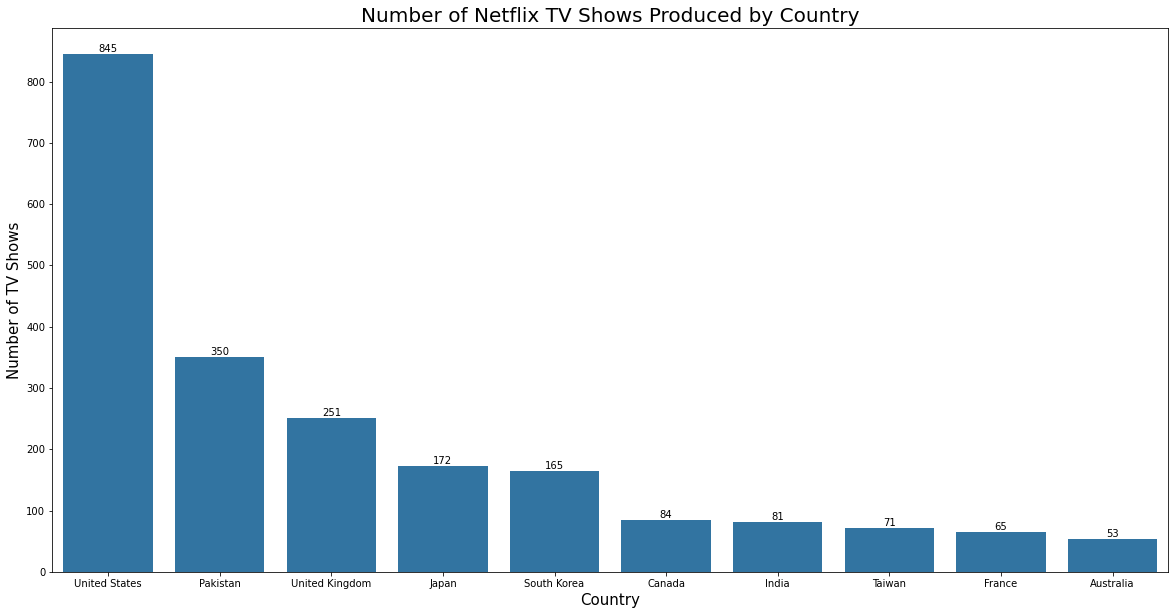

In [28]:
# Limiting to top 10 countries
sort_order = df_tv.groupby('country').count().sort_values(by = 'show_id', ascending = False)[0:10].index
df_tv_c = df_tv[df_tv['country'].isin(sort_order)]
base_color = sns.color_palette()[0]
plt.figure(figsize = [20,10])
tv_c = sns.countplot(x='country',data = df_tv_c,order = sort_order, color = base_color)
tv_c.set_title('Number of Netflix TV Shows Produced by Country', fontsize = 20)
tv_c.set_xlabel('Country', fontsize = 15)
tv_c.set_ylabel('Number of TV Shows', fontsize = 15)
for container in tv_c.containers:
    tv_c.bar_label(container)

In [29]:
# The United States produced most of Netflix's TV Shows followed by Pakistan
# Pakistan at second is a surprise as most of the content on Netflix is primarily in English

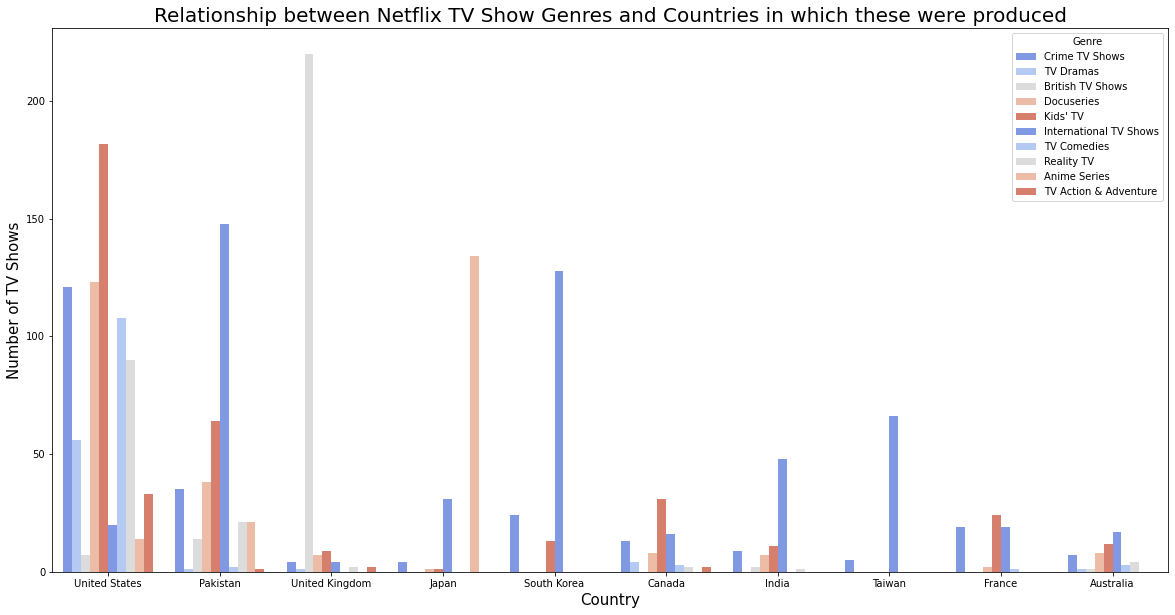

In [36]:
# Next I'll check the relationship between TV Show Genres and the Country it was produced in
# Limit to top 10 TV Show Genres

plt.figure(figsize=[20,10])

order1 = df_tv.groupby('listed_in1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_f = df_tv[df_tv['listed_in1'].isin(order1)]

order2 = df_tv_f.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_f = df_tv_f[df_tv_f['country'].isin(order2)]

base_color = sns.color_palette('coolwarm',n_colors=5)

a=df_tv.date_added.dt.year

tv_g = sns.countplot(data=df_tv_f,x='country',hue='listed_in1', palette=base_color, order=order2)
tv_g.set_xlabel('Country',fontsize = 15)
tv_g.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g.set_title("Relationship between Netflix TV Show Genres and Countries in which these were produced",fontsize = 20)
plt.legend(title = 'Genre', loc = 'upper right')

In [37]:
# The United States has the largest diversity in shows produced
# International TV Shows and Kids' TV are the most popular genres
# It makes sense that Japan produced the most anime series as almost 3/4 of the Japanese population watches anime

/var/folders/mc/4gd9wld50ns1vjc6g4vp41500000gn/T/ipykernel_59966/1239817794.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tv_f = df_tv[ry_f][da_f]


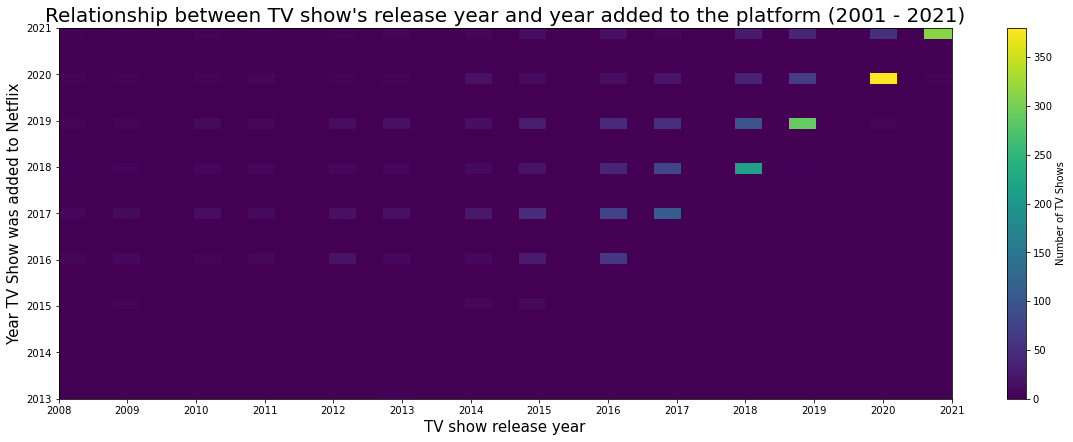

In [38]:
#Relationship between TV Shows date added to Netflix and their respective release date (>=2007)

plt.figure(figsize=[20,15])
plt.subplot(2,1,1)

ry_f = df_tv.release_year>2007
da_f = df_tv.date_added.dt.year>2008

df_tv_f = df_tv[ry_f][da_f]
tv_rd1 = plt.hist2d(data=df_tv_f,x='release_year',y=df_tv_f.date_added.dt.year, bins=33)

plt.xticks(np.arange(2008,2022,1));
plt.yticks(np.arange(2013,2022,1));
#
plt.xlabel('TV show release year',fontsize = 15)
plt.ylabel('Year TV Show was added to Netflix',fontsize = 15)
plt.title("Relationship between TV show's release year and year added to the platform (2001 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of TV Shows')

In [39]:
# We can see that there is a gradual increase from 2016-2021, this may be due to the fact that Netflix
# started producing their own TV Shows in 2016

In [40]:
# Next, I'll investigate TV Show classification and year added to Netflix, again limiting to top 10

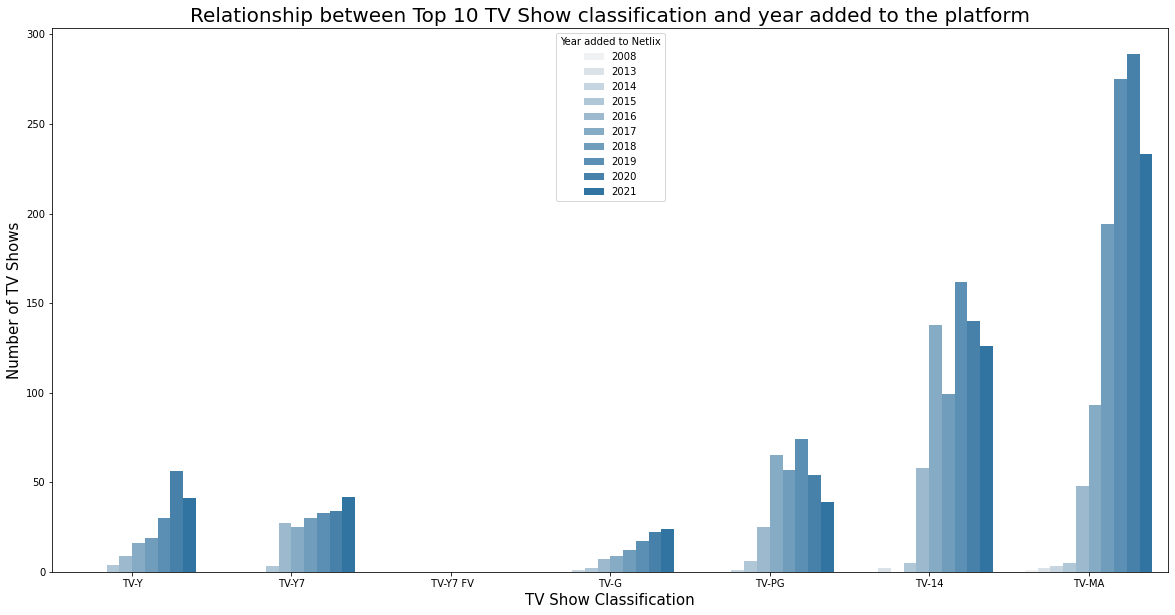

In [41]:
plt.figure(figsize=[20,10])
order = ['TV-Y','TV-Y7',' TV-Y7 FV','TV-G','TV-PG','TV-14','TV-MA']
base_color = sns.color_palette()[0]

a = df_tv.date_added.dt.year

tv_g = sns.countplot(data=df_tv,x='rating',hue=a,order=order,color=base_color)

tv_g.set_xlabel('TV Show Classification',fontsize = 15)
tv_g.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g.set_title("Relationship between Top 10 TV Show classification and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix',)

In [42]:
# A more visible rate of growth for TV-MA TV Shows on Netflix
# This may indicate that their target audience is more mature

In [44]:
# This study focused on the data extracted for Netflix TV Shows, it can also be repeated with identical code for Netflix Movies